### Here we see we have only 1000 sample, 
#### so for processing we will try to augment dataset, for that we will use 
- gray scale, blue scale, redscale , green salce
- flipping (veritical, horizontal)
- roration, 
- image dimention recution



In [1]:
!pip install opencv-python

In [1]:
# Imports
import os
import matplotlib.pyplot as plt
from PIL import Image
import math
import numpy as np
import keras
# from keras_preprocessing.image import img_to_array
from tensorflow.keras.utils import array_to_img
from keras.preprocessing import image
import cv2

from skimage.io import imread

In [2]:
# Load all image directory
dir_with_examples = './image'
files_per_row = 3

# List the directory and perform computations
files_in_dir = os.listdir(dir_with_examples)
files_in_dir

['fabric',
 'foliage',
 'glass',
 'leather',
 'metal',
 'paper',
 'plastic',
 'stone',
 'water',
 'wood']

In [3]:
# Convert image directory to Pandas array
from pathlib import Path
import glob
import pandas as pd

# reading images from path

train_data = []

for i in  range(10):  
    images_dir = Path('./image/'+files_in_dir[0])
    images = images_dir.glob("*.jpg")
    for img in images:
        img = imread(img)
        #dimention reduction 
        img = cv2.resize(img, (229,229))
        train_data.append((img,i))

# converting data into pandas dataframe for easy visualization 
train_data = pd.DataFrame(train_data,columns=['img','label'],index = None)

In [4]:
#compare funtion before after preprocessing
def compare(
    original,
    filtered,
    title_filtered="Filtered",
    cmap_type="gray",
    axis=False,
    title_original="Original",
):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)

    ax1.imshow(original, cmap=cmap_type)
    ax1.set_title(title_original)

    ax2.imshow(filtered, cmap=cmap_type)
    ax2.set_title(title_filtered)

    if not axis:
        ax1.axis("off")
        ax2.axis("off")
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0.01)
    plt.margins(0, 0)
    plt.show();

In [5]:
#showing  image as np array and I have levelled each categories of image from 0 to 9
train_data

,img,label
0,"[[[124, 115, 136], [149, 140, 163], [139, 130,...",0
1,"[[[99, 146, 68], [98, 145, 67], [98, 142, 67],...",0
2,"[[[124, 115, 136], [149, 140, 163], [139, 130,...",0
3,"[[[124, 115, 136], [149, 140, 163], [139, 130,...",0
4,"[[[124, 115, 136], [149, 140, 163], [139, 130,...",0
...,...,...
995,"[[[254, 244, 227], [253, 246, 231], [255, 252,...",9
996,"[[[154, 74, 77], [154, 74, 77], [154, 74, 77],...",9
997,"[[[48, 50, 36], [48, 50, 36], [43, 45, 31], [3...",9
998,"[[[162, 167, 176], [201, 205, 214], [222, 226,...",9


In [26]:
train_data['img'][0].shape

(229, 229, 3)

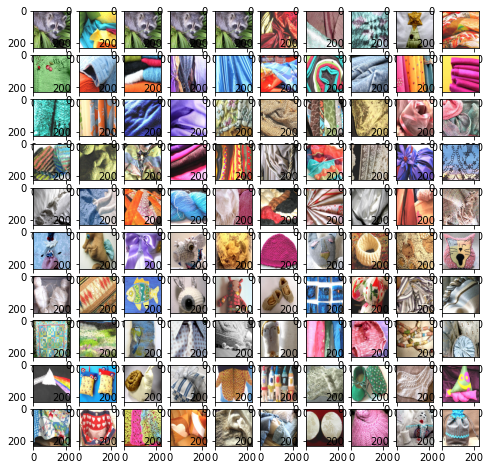

In [51]:
from sklearn.datasets import load_digits
from tensorflow.keras.utils import array_to_img
digits = load_digits()
digits.images.shape

import matplotlib.pyplot as plt
fig, axes = plt.subplots(10,10, figsize=(8,8))

for i,ax in enumerate(axes.flat):
    ax.imshow(array_to_img(train_data['img'][i]))

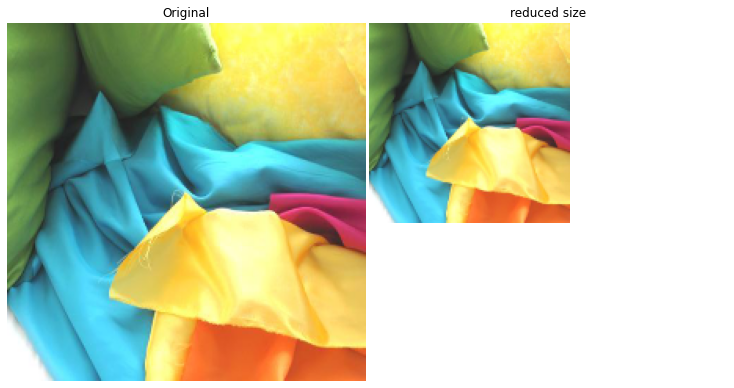

In [98]:
# For resize we have used this command
img = cv2.resize(train_data['img'][1], (128,128))
img.shape


# gray = rgb2gray(new_rotate_dataset['img'][0])

compare(train_data['img'][1], img, "reduced size")

In [ ]:
#comvert all dataset resize
from PIL import Image
import os, sys
resize_list=[]
for i in range (1000):
    resize_list.append(np.reshape(train_data['img'][i]))
    resize_list.shape

 



#### 1. Convert all dataset flip

In [70]:
#comvert all dataset flip
flip_list=[]
for i in range (1000):
    flip_list.append(np.fliplr(train_data['img'][i]))

    # read the img data for flliping

new_filp_dataset= {'img': flip_list, 'label': train_data['label'] }
new_filp_dataset = pd.DataFrame(data=new_filp_dataset)
new_filp_dataset

,img,label
0,"[[[121, 130, 73], [135, 147, 97], [164, 164, 1...",0
1,"[[[255, 230, 80], [253, 229, 95], [253, 232, 1...",0
2,"[[[121, 130, 73], [135, 147, 97], [164, 164, 1...",0
3,"[[[121, 130, 73], [135, 147, 97], [164, 164, 1...",0
4,"[[[121, 130, 73], [135, 147, 97], [164, 164, 1...",0
...,...,...
995,"[[[69, 59, 57], [70, 61, 58], [70, 60, 58], [6...",9
996,"[[[125, 79, 76], [125, 79, 76], [125, 79, 76],...",9
997,"[[[9, 0, 0], [9, 0, 0], [9, 0, 0], [10, 0, 0],...",9
998,"[[[151, 180, 181], [115, 146, 148], [59, 92, 9...",9


show flipped dataset


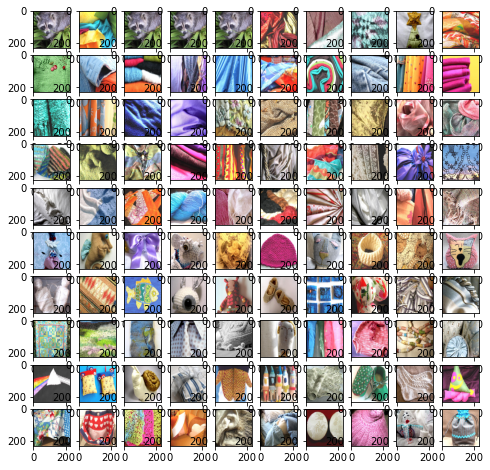

In [71]:
print('show flipped dataset')
fig, axes = plt.subplots(10,10, figsize=(8,8))

for i,ax in enumerate(axes.flat):
    ax.imshow(array_to_img(new_filp_dataset['img'][i]))

#### 2. Convert all dataset roration

In [72]:
#rorate all image 

import random
def rotation(img):
  rows,cols = img.shape[0],img.shape[1]
  randDeg = random.randint(-180, 180)
  matrix = cv2.getRotationMatrix2D((cols/2, rows/2), randDeg, 0.70)
  rotated = cv2.warpAffine(img, matrix, (rows, cols), borderMode=cv2.BORDER_CONSTANT,borderValue=(144, 159, 162))
  return rotated 

#convert all dataset rotation
rotate_list=[]
for i in range (1000):
    rotate_list.append(rotation(train_data['img'][i]))
    

    
new_rotate_dataset= {'img': rotate_list, 'label': train_data['label'] }
new_rotate_dataset = pd.DataFrame(data=new_rotate_dataset)
new_rotate_dataset

,img,label
0,"[[[144, 159, 162], [144, 159, 162], [144, 159,...",0
1,"[[[144, 159, 162], [144, 159, 162], [144, 159,...",0
2,"[[[144, 159, 162], [144, 159, 162], [144, 159,...",0
3,"[[[144, 159, 162], [144, 159, 162], [144, 159,...",0
4,"[[[144, 159, 162], [144, 159, 162], [144, 159,...",0
...,...,...
995,"[[[144, 159, 162], [144, 159, 162], [144, 159,...",9
996,"[[[144, 159, 162], [144, 159, 162], [144, 159,...",9
997,"[[[144, 159, 162], [144, 159, 162], [144, 159,...",9
998,"[[[144, 159, 162], [144, 159, 162], [144, 159,...",9


new_rotate_dataset


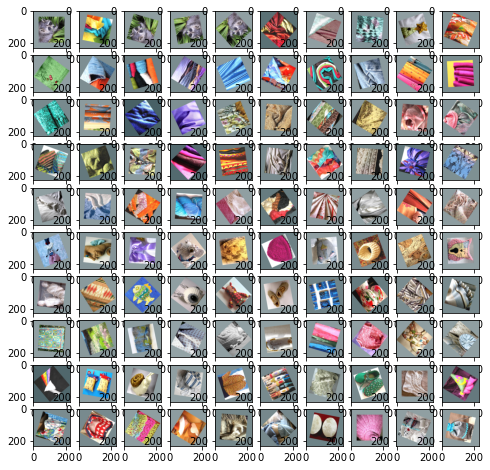

In [73]:
# SHow rorate dataset
print('new_rotate_dataset')

fig, axes = plt.subplots(10,10, figsize=(8,8))

for i,ax in enumerate(axes.flat):
    ax.imshow(array_to_img(new_rotate_dataset['img'][i]))

#### 3. Convert all dataset Gray scale

In [64]:
from skimage.color import rgb2gray
gray_list=[]
for i in range (1000):
    gray_list.append(rgb2gray(train_data['img'][i]))

new_gray_dataset = pd.DataFrame(data={'img': gray_list, 'label': train_data['label'] })
new_gray_dataset

,img,label
0,"[[0.4644180392156863, 0.5630227450980393, 0.52...",0
1,"[[0.5113282352941176, 0.5074066666666667, 0.49...",0
2,"[[0.4644180392156863, 0.5630227450980393, 0.52...",0
3,"[[0.4644180392156863, 0.5630227450980393, 0.52...",0
4,"[[0.4644180392156863, 0.5630227450980393, 0.52...",0
...,...,...
995,"[[0.9603894117647059, 0.9662980392156864, 0.98...",9
996,"[[0.3577109803921569, 0.3577109803921569, 0.35...",9
997,"[[0.19045333333333334, 0.19045333333333334, 0....",9
998,"[[0.6532800000000001, 0.8031329411764706, 0.88...",9


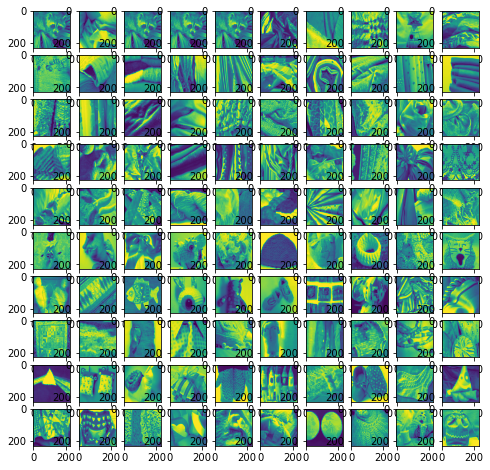

In [65]:
fig, axes = plt.subplots(10,10, figsize=(8,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(new_gray_dataset['img'][i])

###  All augment data

In [66]:
original_data=train_data
all_aug_data=pd.concat([original_data, new_filp_dataset, new_rotate_dataset, new_gray_dataset])


In [67]:
print('all augment data')
all_aug_data

all augment data


,img,label
0,"[[[124, 115, 136], [149, 140, 163], [139, 130,...",0
1,"[[[99, 146, 68], [98, 145, 67], [98, 142, 67],...",0
2,"[[[124, 115, 136], [149, 140, 163], [139, 130,...",0
3,"[[[124, 115, 136], [149, 140, 163], [139, 130,...",0
4,"[[[124, 115, 136], [149, 140, 163], [139, 130,...",0
...,...,...
995,"[[0.9603894117647059, 0.9662980392156864, 0.98...",9
996,"[[0.3577109803921569, 0.3577109803921569, 0.35...",9
997,"[[0.19045333333333334, 0.19045333333333334, 0....",9
998,"[[0.6532800000000001, 0.8031329411764706, 0.88...",9


In [191]:
# img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# img

In [190]:
# def hist(img):
#   img_to_yuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
#   img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0])
#   hist_equalization_result = cv2.cvtColor(img_to_yuv, cv2.COLOR_YUV2BGR)
#   return hist_equalization_result
# x=hist(image)

# x.shape

In [ ]:

from sklearn.model_selection import train_test_split

import numpy as np

Data_type = object
out = np.array(original_data['img'], dtype=Data_type)

X_train, X_test, y_train, y_test = train_test_split(out, original_data['label'], test_size=0.5, random_state=42)

p=[]
for i in X_train:
    p.append(list(i))
    #print(p)
X_train=np.array(p)
X_train.shape


c=[]
for i in X_test:
    c.append(list(i))
    print(c)
X_test=np.array(c)
X_test.shape


In [189]:
# #rotate
# import random
# def rotation(img):
#   rows,cols = img.shape[0],img.shape[1]
#   randDeg = random.randint(-180, 180)
#   matrix = cv2.getRotationMatrix2D((cols/2, rows/2), randDeg, 0.70)
#   rotated = cv2.warpAffine(img, matrix, (rows, cols), borderMode=cv2.BORDER_CONSTANT,borderValue=(144, 159, 162))
#   return rotated 

# x=rotation(image)
# x.shape
# array_to_img(x)